In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
def interpolation(points: np.array) -> np.array:
    n: int = points.shape[1] - 1
    d: int = points.shape[0]  # dimension
    t_i = np.array([2 * np.pi / (n + 1) * i for i in range(0, n + 1)])
    t = np.linspace(0, 2 * np.pi, 100)

    if n % 2 == 0:  # falls n gerade
        m = n // 2
        theta = 0
    else:  # falls n ungerade
        m = (n - 1) // 2
        theta = 1

    fs = np.ndarray(shape=(d, len(t)))

    for dim in range(d):
        z = points[dim, :]
        a = np.array(
            [
                2 / (n + 1) * np.sum([z[j] * np.cos(j * t_i[k]) for j in range(n + 1)])
                for k in range(m + 1)
            ]
        )
        b = np.array(
            [
                2 / (n + 1) * np.sum([z[j] * np.sin(j * t_i[k]) for j in range(n + 1)])
                for k in range(1, m + 1)
            ]
        )

        f1 = a[0] / 2
        f2 = np.sum(
            [a[k] * np.cos(k * t) + b[k - 1] * np.sin(k * t) for k in range(1, m + 1)],
            axis=0,
        )
        f3 = theta / 2 * a[m] * np.cos((m + 1) * t) if theta == 1 else 0
        f = f1 + f2 + f3
        fs[dim, :] = f

    return fs

In [115]:
points = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                   [0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0]])

fs = interpolation(points)

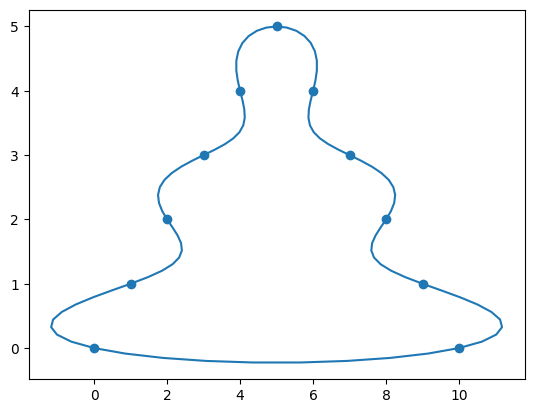

In [116]:
plt.scatter(points[0, :], points[1, :])
plt.plot(fs[0, :], fs[1, :])